In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functools as ft

In [2]:
filename = r'C:\Users\leoma\Notebooks\TP2019\pesajes_nulos.csv'
pesajes = pd.read_csv(filename, delimiter=';', decimal='.')

In [3]:
## AHORA TODOS SON FLOTANTES (este bloque despues borrarlo)

for i in range(0,11):
    print(type(pesajes.iloc[0,i]))

<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [4]:
pesajes.head(3)

,PUNTO,COMUNA,ANIO,MES,SEMANA,VIDRIO,PAPEL_Y_CARTON,METAL,TELGOPOR,PLASTICOS_TODOS_LOS_DEMAS,TETRA_BRICK
0,PARQUE AVELLANEDA,COMUNA 9,2015,1,1,163.23,123.67,27.55,0.00,67.17,8.54
1,PARQUE AVELLANEDA,COMUNA 9,2015,1,2,143.71,138.21,7.91,0.00,67.31,8.54
2,PARQUE AVELLANEDA,COMUNA 9,2015,1,3,134.47,154.43,7.24,1.42,75.35,8.54


In [5]:
filename = r'C:\Users\leoma\Desktop\UTN\Ciencia de Datos\DataSets\TP2019\puntos-verdes.csv'
puntos_verdes = pd.read_csv(filename, delimiter=',')
puntos_verdes.head(3)

,long,lat,id,plaza,tipo,tipo_norma,materiales,dias_y_horario,cooperativa,calle,altura,calle2,direccion,barrio,comuna,observaciones
0,-58.465309,-34.567226,1,Plaza Castelli,Punto Verde Con Atención,punto_verde_con_atencion,Papel / Cartón / Vidrio / Metal / Plástico / T...,Miércoles a Domingos de 11 a 19hs.,Amanecer,Conde,0,Juramento,CONDE y JURAMENTO,Belgrano,Comuna 13,"Para entregar los materiales, éstos deben esta..."
1,-58.424945,-34.589219,2,Plaza Armenia,Punto Verde Con Atención,punto_verde_con_atencion,Papel / Cartón / Vidrio / Metal / Plástico / T...,Miércoles a Domingos de 11 a 19hs.,Ceibo,Malabia,0,Costa Rica,MALABIA y COSTA RICA,Palermo,Comuna 14,"Para entregar los materiales, éstos deben esta..."
2,-58.468392,-34.547087,3,Plaza Balcarce,Punto Verde Con Atención,punto_verde_con_atencion,Papel / Cartón / Vidrio / Metal / Plástico / T...,Miércoles a Domingos de 11 a 19hs.,Madreselva,Manzanares,0,Vuelta de Obligado,MANZANARES y VUELTA DE OBLIGADO,Nuñez,Comuna 13,"Para entregar los materiales, éstos deben esta..."


In [6]:
puntos_verdes = puntos_verdes.iloc[:,[0,1,14]]
puntos_verdes = puntos_verdes.dropna()
puntos_verdes.drop_duplicates().isnull().sum()

long      0
lat       0
comuna    0
dtype: int64

In [7]:
# Traducimos las comunas a solamente un numero y mergeamos los Dataframes

comunas_distintas_puntosVerdes = ['Comuna 1', 'Comuna 2', 'Comuna 3', 'Comuna 4', 'Comuna 5', 'Comuna 6', 'Comuna 7',
                                  'Comuna 8', 'Comuna 9', 'Comuna 10', 'Comuna 11', 'Comuna 12', 'Comuna 13', 'Comuna 14', 'Comuna 15']

comunas_distintas_Pesajes = ['COMUNA 1', 'COMUNA 2', 'COMUNA 3', 'COMUNA 4', 'COMUNA 5', 'COMUNA 6', 'COMUNA 7','COMUNA 8',
                             'COMUNA 9', 'COMUNA 10', 'COMUNA 11', 'COMUNA 12', 'COMUNA 13', 'COMUNA 14', 'COMUNA 15']
for i in range (1,16):
    puntos_verdes.loc[ puntos_verdes['comuna'] == comunas_distintas_puntosVerdes[i-1], 'comuna'] = i
    pesajes.loc[ pesajes['COMUNA'] == comunas_distintas_Pesajes[i-1], 'COMUNA'] = i

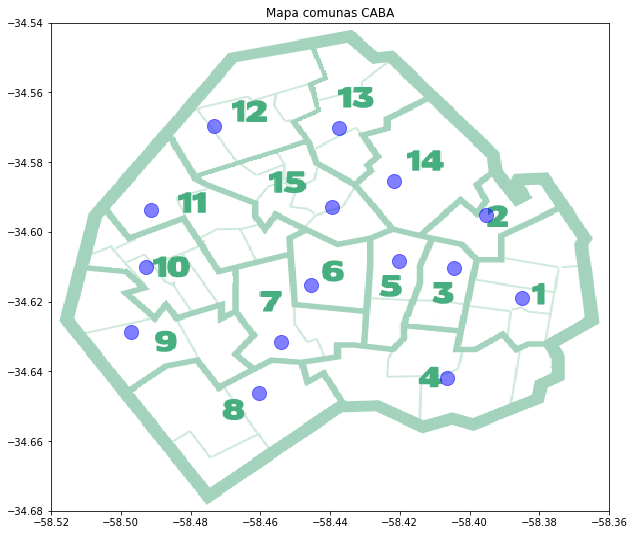

In [8]:
# Centro los puntos puntos_verdes en cada comuna
centros_puntos_verdes = puntos_verdes.groupby('comuna', as_index=False).agg('mean')

#Reacoomodo las coordenadas para que queden bien ubicadas en el mapa
centros_puntos_verdes.iloc[0,1] -= 0.01 # Longitud COMUNA 1 Si le resto va a la izq
centros_puntos_verdes.iloc[0,2] -= 0.01 # Latitud COMUNA 1 Si le resto baja
centros_puntos_verdes.iloc[1,1] += 0.003;centros_puntos_verdes.iloc[1,2] -= 0.005 # COMUNA 2
centros_puntos_verdes.iloc[2,1] -= 0.002;centros_puntos_verdes.iloc[2,2] += 0.005 # COMUNA 3
centros_puntos_verdes.iloc[3,1] -= 0.016 # COMUNA 4
centros_puntos_verdes.iloc[4,1] -= 0.004;centros_puntos_verdes.iloc[4,2] += 0.01 # COMUNA 5
centros_puntos_verdes.iloc[5,1] -= 0.004;centros_puntos_verdes.iloc[5,2] -= 0.001 # COMUNA 6
centros_puntos_verdes.iloc[7,1] += 0.004;centros_puntos_verdes.iloc[7,2] += 0.03 # COMUNA 8
centros_puntos_verdes.iloc[8,1] += 0.007;centros_puntos_verdes.iloc[8,2] += 0.018 # COMUNA 9
centros_puntos_verdes.iloc[9,1] += 0.007;centros_puntos_verdes.iloc[9,2] += 0.017 # COMUNA 10
centros_puntos_verdes.iloc[10,1] += 0.001;centros_puntos_verdes.iloc[10,2] += 0.01 # COMUNA 11
centros_puntos_verdes.iloc[11,1] += 0.015 # COMUNA 12
centros_puntos_verdes.iloc[12,1] += 0.015;centros_puntos_verdes.iloc[12,2] -= 0.01 # COMUNA 13
centros_puntos_verdes.iloc[13,2] -= 0.005 # COMUNA 14
centros_puntos_verdes.iloc[14,1] += 0.022 # COMUNA 15

BBox = (-58.52,-58.36,-34.68,-34.54)

mapa = plt.imread(r'C:\Users\leoma\Desktop\UTN\Ciencia de Datos\DataSets\TP2019\map - copia.png')

fig, ax = plt.subplots(figsize = (10,15))
ax.scatter(centros_puntos_verdes.long, centros_puntos_verdes.lat, zorder=1, alpha= 0.5, c='b', s=200)
ax.set_title('Mapa comunas CABA')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapa, zorder=0, extent = BBox, aspect= 'equal')

In [9]:
centros_puntos_verdes = centros_puntos_verdes.rename(columns = {"comuna": "COMUNA"})

In [10]:
pesajes_con_coordenadas = pd.merge(pesajes, centros_puntos_verdes, how='left', on='COMUNA')

In [11]:
## Los 3 conjuntos de Y que vamos a tratar de predecir
## MEDIA MENSUAL DE LOS DISTINTOS TIPOS DE RECICLABLES
pesajes_mediaSemanal = pesajes.iloc[:,[1,2,3,5,6,7,8,9,10]].groupby(["COMUNA","ANIO","MES"], as_index=False).mean()
pesajes_mediaSemanal.head(3)

## TOTAL MENSUAL DE LOS DISTINTOS TIPOS DE RECICLABLES
pesajes_totalMensual = pesajes.iloc[:,[1,2,3,5,6,7,8,9,10]].groupby(["COMUNA","ANIO","MES"], as_index=False).sum()
pesajes_totalMensual.head(3)

## CAMBIO RELATIVO CON RESPECTO AL MES ANTERIOR DE LOS DISTINTOS TIPOS DE RECICLABLES
#  Elimino primer mes porque no conozco su cambio relativo con su mes anterior
pesajes_cambioRelativo = pd.concat([pesajes_totalMensual.iloc[1:,[0,1,2]],pesajes_totalMensual.pct_change().iloc[1:,3:]], axis=1)
pesajes_cambioRelativo.head(3)

,COMUNA,ANIO,MES,VIDRIO,PAPEL_Y_CARTON,METAL,TELGOPOR,PLASTICOS_TODOS_LOS_DEMAS,TETRA_BRICK
1,1,2015,2,-0.136093,-0.067156,-0.271671,-0.630109,0.042966,-0.200000
2,1,2015,3,-0.088822,-0.007907,0.176431,-0.327413,0.366614,0.000000
3,1,2015,4,0.148648,-0.061896,-0.080993,4.022458,0.034014,-0.587009


In [12]:
filename = r'C:\Users\leoma\Desktop\UTN\Ciencia de Datos\DataSets\TP2019\pauta-publicitaria-2016.csv'
publi_2016 = pd.read_csv(filename, delimiter=',')

filename = r'C:\Users\leoma\Desktop\UTN\Ciencia de Datos\DataSets\TP2019\pauta-publicitaria-2015.csv'
publi_2015 = pd.read_csv(filename, delimiter=';')

In [13]:
publi_2016[publi_2016['CAMPAÑA'] == 'PLANETA VERDE']#.head(3)

,FECHA PUBLICACIÓN,TIPO MEDIO,MEDIO,IMPORTE,RAZON SOCIAL MEDIO,CAMPAÑA


In [14]:
publi_2015[publi_2015['CAMPAÑA'] == 'SEPAREMOS RECICLABLES']#.head(3)

,FECHA_PUBLICACIÓN,TIPO MEDIO,MEDIO,IMPORTE,RAZON_SOCIAL_MEDIO,CAMPAÑA
8899,03/05/2015,MEDIOS GRAFICOS,TIEMPO ARGENTINO,"125672,46",BALKRUG S.A.,SEPAREMOS RECICLABLES
8942,04/05/2015,MEDIOS GRAFICOS,EL CRONISTA,"211750,97",EL CRONISTA COMERCIAL S.A.,SEPAREMOS RECICLABLES
9133,09/05/2015,MEDIOS GRAFICOS,TIEMPO ARGENTINO,"91963,87",BALKRUG S.A.,SEPAREMOS RECICLABLES
9200,11/05/2015,MEDIOS GRAFICOS,EL CRONISTA,"211750,97",EL CRONISTA COMERCIAL S.A.,SEPAREMOS RECICLABLES
9201,11/05/2015,MEDIOS GRAFICOS,LA RAZON,"195549,48",ARTE GRÁFICO EDITORIAL ARGENTINO S.A.,SEPAREMOS RECICLABLES
9252,12/09/2015,MEDIOS GRAFICOS,CLARIN,"599253,76",ARTE GRÁFICO EDITORIAL ARGENTINO S.A.,SEPAREMOS RECICLABLES
9253,12/09/2015,MEDIOS GRAFICOS,TIEMPO ARGENTINO,"150325,56",BALKRUG S.A.,SEPAREMOS RECICLABLES
9355,16/05/2015,MEDIOS GRAFICOS,TIEMPO ARGENTINO,66550,BALKRUG S.A.,SEPAREMOS RECICLABLES
9383,17/05/2015,MEDIOS GRAFICOS,TIEMPO ARGENTINO,"125672,46",BALKRUG S.A.,SEPAREMOS RECICLABLES
9489,21/05/2015,MEDIOS GRAFICOS,EL ESTADISTA,"9733,61",ESECOM S.A.,SEPAREMOS RECICLABLES


In [15]:
## Nos quedamos solo con las campañas que incentivan el reciclaje


# Tienen que ver con deporte y salud verde 'ECO BICI', 'ECOBICI', ESTACIONES SALUDABLES
# Muestran la ciudad y nombran el reciclaje: BA MÁS LINDA(con y sin acento), PLANETA VERDE

# BASURA 0, PUNTOS VERDES, SEPARACIÓN DE RESIDUOS, CIUDAD VERDE ,CIUDAD VERDE - SEPARACIÓN DE RESIDUOS,
# SEPAREMOS LOS RECICLABLES (y sin el "LOS"), SUMA VERDE RED

# Separamos solo los que hacen referencia al reciclado y separacion de residuos
publi_2015_verde = publi_2015[publi_2015['CAMPAÑA'].isin(['BASURA 0','PUNTOS VERDES','SEPARACIÓN DE RESIDUOS','CIUDAD VERDE',
                                                          'CIUDAD VERDE - SEPARACIÓN DE RESIDUOS','SEPAREMOS LOS RECICLABLES','SUMA VERDE RED'])]

publi_2016_verde = publi_2016[publi_2016['CAMPAÑA'].isin(['BASURA: ENTRE TODOS ','CIUDAD LIMPIA','CIUDAD VERDE','CIUDAD VERDE: BASURA: ENTRE TODOS',
                                                          'CONSUMO RESPONSABLE','PARTICIPACION CIUDADANA','RECICLAJE','SEPARACION DE RECICLABLES'])]

In [16]:
 #publi_2015_verde[publi_2015_verde.duplicated()]
publi_2015_verde.head(2)

,FECHA_PUBLICACIÓN,TIPO MEDIO,MEDIO,IMPORTE,RAZON_SOCIAL_MEDIO,CAMPAÑA
417,01/01/2015,Via pública,Grandes Formatos,173635,VAZQUEZ SEBASTIAN ANDRES,CIUDAD VERDE
567,31/01/2015,WEB,WWW.LANACION.COM.AR,605000,LA NACION SA,CIUDAD VERDE


In [17]:
# Convierto la fecha al formato del DataFrame de pesajes con la columna ANIO y MES
publi_2015_verde['FECHA_PUBLICACIÓN'] = pd.to_datetime(publi_2015_verde['FECHA_PUBLICACIÓN'])
publi_2015_verde['ANIO'], publi_2015_verde['MES'] = publi_2015_verde['FECHA_PUBLICACIÓN'].dt.year, publi_2015_verde['FECHA_PUBLICACIÓN'].dt.month

publi_2016_verde['FECHA PUBLICACIÓN'] = pd.to_datetime(publi_2016_verde['FECHA PUBLICACIÓN'])
publi_2016_verde['ANIO'], publi_2016_verde['MES'] = publi_2016_verde['FECHA PUBLICACIÓN'].dt.year, publi_2016_verde['FECHA PUBLICACIÓN'].dt.month
publi_2015_verde.head(2)

C:\Users\leoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\leoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\leoma\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

,FECHA_PUBLICACIÓN,TIPO MEDIO,MEDIO,IMPORTE,RAZON_SOCIAL_MEDIO,CAMPAÑA,ANIO,MES
417,2015-01-01,Via pública,Grandes Formatos,173635,VAZQUEZ SEBASTIAN ANDRES,CIUDAD VERDE,2015,1
567,2015-01-31,WEB,WWW.LANACION.COM.AR,605000,LA NACION SA,CIUDAD VERDE,2015,1


In [18]:
# Nos quedamos solo con las columnas que vamos a usar

publi_2015_verde = publi_2015_verde.iloc[:,[1,5,6,7]]
publi_2016_verde = publi_2016_verde.iloc[:,[1,5,6,7]]

In [19]:
# Unificamos los tipos en Radio, Web, Diario/Revista, Via pública
print(f"Antes :{np.unique(publi_2015_verde['TIPO MEDIO'])}\n")

publi_2015_verde.loc[ publi_2015_verde['TIPO MEDIO'] == 'MEDIOS GRAFICOS', 'TIPO MEDIO'] = 'Diario/Revista'
publi_2015_verde.loc[ publi_2015_verde['TIPO MEDIO'].isin(['Medio Vecinal/Radio', 'RADIO']), 'TIPO MEDIO'] = 'Radio'
publi_2015_verde.loc[ publi_2015_verde['TIPO MEDIO'].isin(['Medio Vecinal/Web TV', 'TV']), 'TIPO MEDIO'] = 'TV'
publi_2015_verde.loc[ publi_2015_verde['TIPO MEDIO'].isin(['Medio Vecinal/Web', 'WEB']), 'TIPO MEDIO'] = 'Web'

print(f"Despues :{np.unique(publi_2015_verde['TIPO MEDIO'])}")

Antes :['MEDIOS GRAFICOS' 'Medio Vecinal/Radio' 'Medio Vecinal/Web'
 'Medio Vecinal/Web TV' 'RADIO' 'TV' 'Via pública' 'WEB']

Despues :['Diario/Revista' 'Radio' 'TV' 'Via pública' 'Web']


In [20]:
# Unificamos los tipos en Radio, Web, Diario/Revista, Via pública
print(f"Antes :{np.unique(publi_2016_verde['TIPO MEDIO'])}\n")
      
publi_2016_verde.loc[ publi_2016_verde['TIPO MEDIO'].isin(['MEDIOS GRAFICOS','MEDIOS VECINALES/GRAFICA']), 'TIPO MEDIO'] = 'Diario/Revista'
publi_2016_verde.loc[ publi_2016_verde['TIPO MEDIO'].isin(['MEDIOS VECINALES/RADIO', 'RADIO']), 'TIPO MEDIO'] = 'Radio'
publi_2016_verde.loc[ publi_2016_verde['TIPO MEDIO'].isin(['MEDIOS VECINALES/WEB', 'WEB']), 'TIPO MEDIO'] = 'Web'
publi_2016_verde.loc[ publi_2016_verde['TIPO MEDIO'].isin(['CINE', 'TV']), 'TIPO MEDIO'] = 'TV'
publi_2016_verde.loc[ publi_2016_verde['TIPO MEDIO'] == 'VIA PUBLICA', 'TIPO MEDIO'] = 'Via pública'
      
print(f"Despues :{np.unique(publi_2016_verde['TIPO MEDIO'])}")

Antes :['MEDIOS GRAFICOS' 'RADIO' 'TV' 'VIA PUBLICA' 'WEB']

Despues :['Diario/Revista' 'Radio' 'TV' 'Via pública' 'Web']


In [21]:
ramas = np.unique(publi_2016_verde.CAMPAÑA.astype(str), return_counts = True)[0]
veces_por_rama = np.unique(publi_2016_verde.CAMPAÑA.astype(str), return_counts = True)[1]

In [22]:
ramas

array(['BASURA: ENTRE TODOS ', 'CIUDAD LIMPIA', 'CIUDAD VERDE',
       'CIUDAD VERDE: BASURA: ENTRE TODOS', 'CONSUMO RESPONSABLE',
       'PARTICIPACION CIUDADANA', 'RECICLAJE',
       'SEPARACION DE RECICLABLES'], dtype=object)

In [23]:
veces_por_rama

array([ 14,   1,  30,  10,   1, 263,   1,  98], dtype=int64)

In [24]:
ramas2 = np.unique(publi_2015_verde['TIPO MEDIO'].astype(str), return_counts = True)[0]
veces_por_rama2 = np.unique(publi_2015_verde['TIPO MEDIO'].astype(str), return_counts = True)[1]

In [25]:
ramas2

array(['Diario/Revista', 'Radio', 'TV', 'Via pública', 'Web'],
      dtype=object)

In [26]:
veces_por_rama2

array([ 77, 999, 300,  48, 175], dtype=int64)

In [27]:
#publi_2016_verde
#publi_2015_verde
publi2015groupby = publi_2015_verde.groupby(["ANIO","MES","TIPO MEDIO"], as_index=False).count()
campañas_por_mes_2015 = pd.pivot_table(publi2015groupby,values = 'CAMPAÑA',columns = 'TIPO MEDIO', index = publi2015groupby["MES"], aggfunc = np.sum, fill_value = 0)

publi2016groupby = publi_2016_verde.groupby(["ANIO","MES","TIPO MEDIO"], as_index=False).count()
campañas_por_mes_2016 = pd.pivot_table(publi2016groupby,values = 'CAMPAÑA',columns = 'TIPO MEDIO', index = publi2016groupby["MES"], aggfunc = np.sum, fill_value = 0)

In [28]:
pesajes_mediaSemanal['Diario/Revista'] = np.nan
pesajes_mediaSemanal['Radio'] = np.nan
pesajes_mediaSemanal['TV'] = np.nan
pesajes_mediaSemanal['Via pública'] = np.nan
pesajes_mediaSemanal['Web'] = np.nan

In [29]:
for i in range(0, len(pesajes_mediaSemanal)):
    mes = pesajes_mediaSemanal.iloc[i,2]
    anio = pesajes_mediaSemanal.iloc[i,1]
    if(anio == 2015):
        pesajes_mediaSemanal.iloc[i,9:] = campañas_por_mes_2015.iloc[mes-1]
    elif(anio == 2016 and np.isin(mes,[3,5,6,7,8,9,10,11,12])):
        pesajes_mediaSemanal.iloc[i,9:] = campañas_por_mes_2016.iloc[mes-1]
    else:
        pesajes_mediaSemanal.iloc[i,9:] = 0

In [30]:
## Reordeno las columnas

pesajes_mediaSemanal = pesajes_mediaSemanal.iloc[:,[0,1,2,9,10,11,12,13,3,4,5,6,7,8]]